#                                    Capstone Project

              Kirankumar R G

### Importing Necessary Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV file

In [2]:
df=pd.read_csv(r'CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape
#4340 rows and 8 columns

(4340, 8)

### Data PreProcessing

#### Handling Null values

In [4]:
df.isnull().sum()
#there is no null values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
df.duplicated().sum()

763

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(3577, 8)

In [7]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [8]:
df.describe().round(2)

,year,selling_price,km_driven
count,3577.00,3577.00,3577.00
mean,2012.96,473912.54,69250.55
std,4.25,509301.81,47579.94
min,1992.00,20000.00,1.00
25%,2010.00,200000.00,36000.00
50%,2013.00,350000.00,60000.00
75%,2016.00,600000.00,90000.00
max,2020.00,8900000.00,806599.00


### Analysing Column "name"

In [9]:
df["name"].nunique()
#we have 1491 unique value

1491

In [10]:
car_names=list(df['name'])
#print(car_names)
print(len(car_names))

3577


In [11]:
brand,model,sub_class=[],[],[]
for car in car_names:
    parts=car.split()
    x=parts[0]
    y=parts[1]
    z=parts[2:]
    brand.append(x)
    model.append(y)
    sub_class.append(z)
    
print(len(brand))
print(len(model))
print(len(sub_class))

3577
3577
3577


In [12]:
sub_class=[' '.join(map(str, item)) for item in sub_class]

In [13]:
df['brand']=brand
df['model']=model
df['sub_class']=sub_class
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,sub_class
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,R LXI Minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1.6 SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,T Option
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,VX i-DTEC


#### Approach
1) We have 1497 unique features in name column 
2) To Reduce the complexity in name column we have created three new column such brand,model,sub_class
3) Now we can drop the name column

In [14]:
df.drop('name',axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,sub_class
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,VX i-DTEC


### Exploratory Data Analysis (EDA)

#### Separting Categorical and Numerical Columns

In [15]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index

In [16]:
for i in num_cols:
    print(f'Number of Unique feature for {i}', df[i].nunique())

Number of Unique feature for year 27
Number of Unique feature for selling_price 445
Number of Unique feature for km_driven 770


In [17]:
for i in cat_cols:
    print(f'Number of Unique feature for {i}', df[i].nunique())

Number of Unique feature for fuel 5
Number of Unique feature for seller_type 3
Number of Unique feature for transmission 2
Number of Unique feature for owner 5
Number of Unique feature for brand 29
Number of Unique feature for model 185
Number of Unique feature for sub_class 1388


In [18]:
print(cat_cols)
print(num_cols)

Index(['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'model',
       'sub_class'],
      dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


#### EDA for Categorical Columns

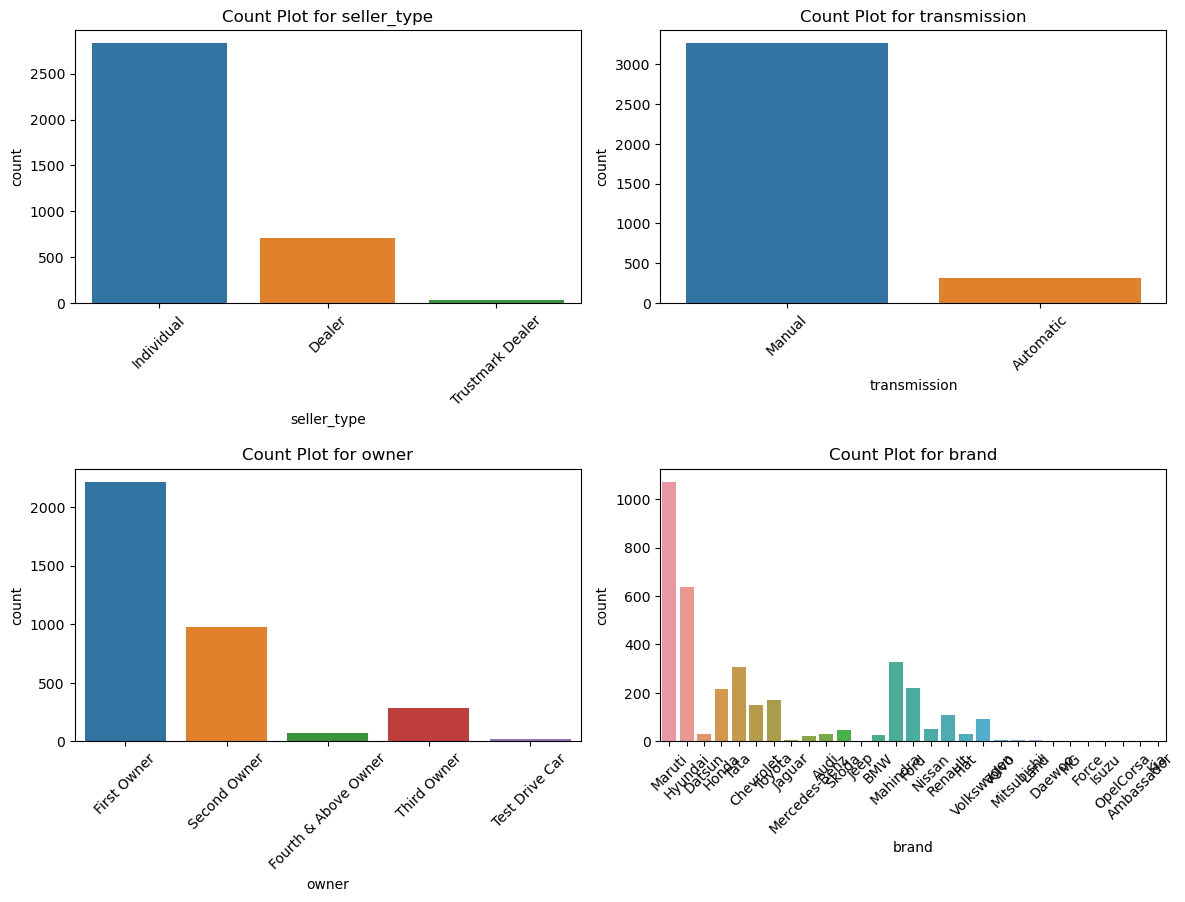

In [19]:
plt.figure(figsize=(12,12))
for i,cat in enumerate(cat_cols[1:5]):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df,x=cat)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot for {cat}')
plt.tight_layout()
#plt.savefig("Categorical Plot")
plt.show()

### Insights
1) Most of the used cars available are belongs to petrol and Diesel category
2) All most all the cars transmisson are of Manually operated
3) Available cars are more likely to be First and 2nd Hand users only
4) Sellers prefer to sell their car directly to customers ( individual ) compare to Dealer or Trusted Dealer
5) Maruti, Hyundai, Mahindra, Tata are most of used cars available in market compare to other brands of cars


#### EDA for Continuous Columns

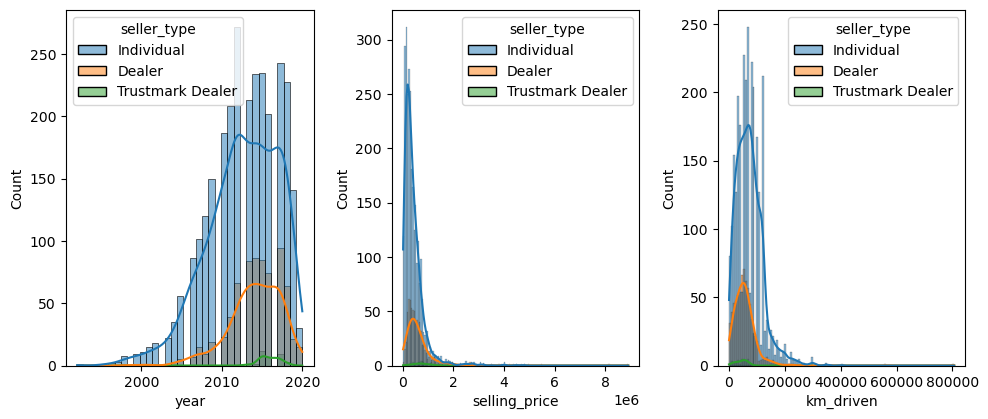

In [20]:
plt.figure(figsize=(10,8))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,x=num_cols[i],kde=True,hue='seller_type')
    plt.xticks(rotation=0)
#plt.savefig('Histoplot ')
plt.tight_layout()
plt.show()

#### Insights
1) Most of the available used cars released after 2005
2) 90 percentage of cars are sold for less than 1500000
3) Sellers prefers to sell their cars before reaching 200000 km 
4) Its clearly indicates individual sellers are more available in the market compare to Third party sellers


#### Box Plots

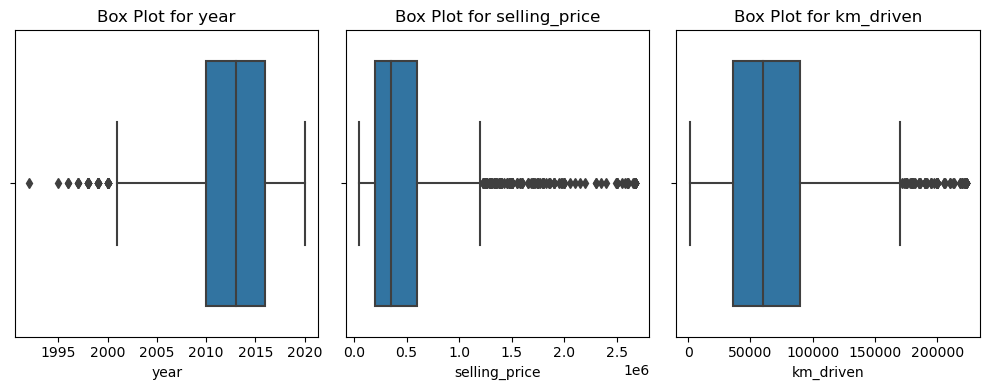

In [90]:
plt.figure(figsize=(10,4))
for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x=num_cols[i])  
    plt.title(f'Box Plot for {num_cols[i]}')
plt.savefig("Box Plot")
plt.tight_layout()
plt.show()

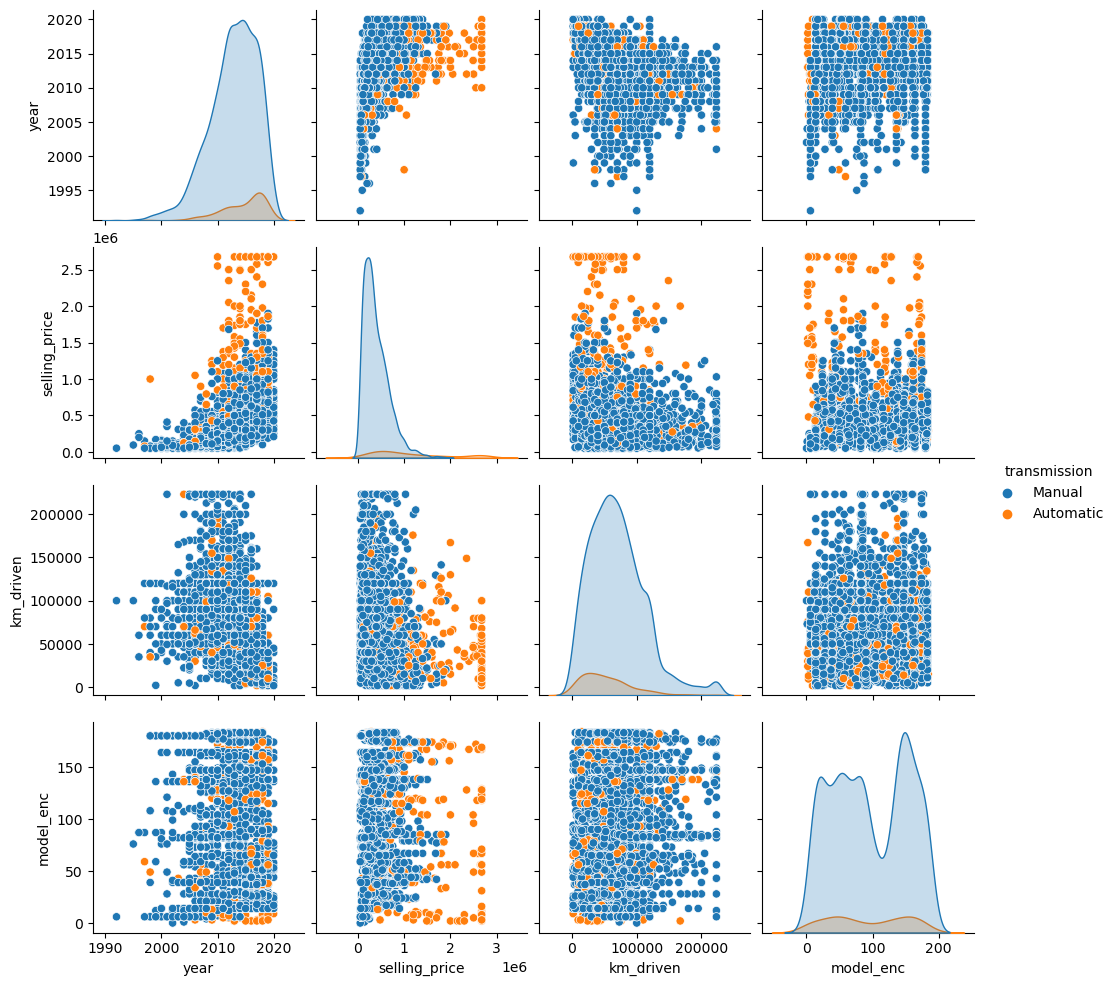

In [91]:
sns.pairplot(df,hue='transmission')
plt.savefig("Paiplot for continuous variable")
plt.show()

### Treating Outliears

In [23]:
r=df.describe(percentiles=(0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99)).T
r=r.iloc[:,3:]
r

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
year,1992.0,2000.00,2003.0,2004.0,2005.0,2013.0,2019.0,2019.0,2019.0,2020.0,2020.0
selling_price,20000.0,51786.64,60000.0,70000.0,80000.0,350000.0,1200000.0,1497200.0,1800000.0,2675000.0,8900000.0
km_driven,1.0,1744.08,5000.0,6525.2,10000.0,60000.0,149534.8,170000.0,193440.0,223158.4,806599.0


In [24]:
#Traeting the selling and Km_driven columns
df['selling_price']=np.where(df["selling_price"]>2675000.0,2675000.0,df['selling_price'])
df['km_driven']=np.where(df['km_driven']>223158.4,223158.4,df['km_driven'])

In [25]:
df['selling_price']=np.where(df["selling_price"]<51786.64,51786.64,df['selling_price'])
df['km_driven']=np.where(df['km_driven']<1744.08,1744.08,df['km_driven'])

In [26]:
r=df.describe(percentiles=(0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99)).T
r=r.iloc[:,3:]
r

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
year,1992.00,2000.0000,2003.0,2004.0,2005.0,2013.0,2019.0,2019.0,2019.0,2020.000,2020.0
selling_price,51786.64,51948.7936,60000.0,70000.0,80000.0,350000.0,1200000.0,1497200.0,1800000.0,2675000.000,2675000.0
km_driven,1744.08,1754.6592,5000.0,6525.2,10000.0,60000.0,149534.8,170000.0,193440.0,223038.016,223158.4


### Correlation Map

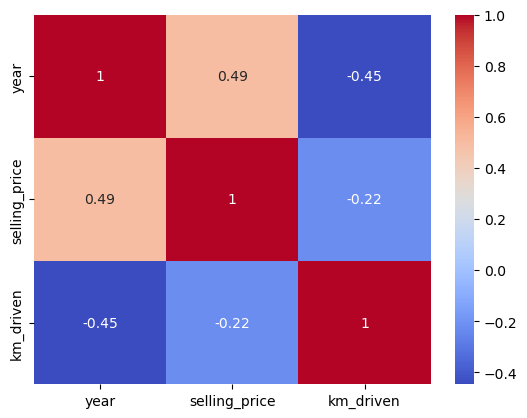

In [92]:
corr=df[num_cols].corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.savefig('Correlation Graph')
plt.show()

In [28]:
df2=df.copy()

In [29]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model', 'sub_class'],
      dtype='object')

### Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [31]:
df['model_enc']=lb.fit_transform(df['model'])

In [32]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,sub_class,model_enc
0,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner,Maruti,800,AC,6
1,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner,Maruti,Wagon,R LXI Minor,164
2,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1.6 SX,161
3,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner,Datsun,RediGO,T Option,125
4,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner,Honda,Amaze,VX i-DTEC,17


In [33]:
x=df[['model_enc','model']]
x.head()

,model_enc,model
0,6,800
1,164,Wagon
2,161,Verna
3,125,RediGO
4,17,Amaze


In [34]:
df.drop(['sub_class'],axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,model_enc
0,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner,Maruti,800,6
1,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner,Maruti,Wagon,164
2,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner,Hyundai,Verna,161
3,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner,Datsun,RediGO,125
4,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner,Honda,Amaze,17


In [35]:
df.drop(['model'],axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model_enc
0,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner,Maruti,6
1,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner,Maruti,164
2,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner,Hyundai,161
3,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner,Datsun,125
4,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner,Honda,17


### Applying one hot encoding for data

In [36]:
df_encoded=pd.get_dummies(df)
df_encoded.head()

,year,selling_price,km_driven,model_enc,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,60000.0,70000.0,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000.0,50000.0,164,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000.0,100000.0,161,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000.0,46000.0,125,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000.0,141000.0,17,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_encoded.shape

(3577, 48)

In [38]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model_enc'],
      dtype='object')

In [39]:
df_encoded.columns

Index(['year', 'selling_price', 'km_driven', 'model_enc', 'fuel_CNG',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_Ambassador',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

In [40]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model_enc'],
      dtype='object')

### Feature selecting

In [41]:
x=df_encoded.drop('selling_price',axis=1)
y=df_encoded['selling_price']
print(x.shape)
print(y.shape)

(3577, 47)
(3577,)


### Model Evaluation

In [42]:
from sklearn.metrics import *

In [43]:
def model_eval(x_train,x_test,y_train,y_test,model,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    mae=mean_absolute_error(y_test,ypred)
    mse=mean_squared_error(y_test,ypred)
    rmse=np.sqrt(mse)
    train_scr=model.score(x_train,y_train)
    test_scr=model.score(x_test,y_test)
    res=pd.DataFrame({"Train_scr":train_scr,"Test_scr":test_scr,'RMSE':rmse,'MSE':mse,
                    "MAE":mae},index=[mname])
    return res
    
def mscore(model):
    train_scr=model.score(x_train,y_train)
    test_scr=model.score(x_test,y_test)
    print("Training Score",train_scr)
    print("Testing Score",test_scr)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
x.head()

,year,km_driven,model_enc,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,70000.0,6,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,50000.0,164,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,100000.0,161,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,46000.0,125,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,141000.0,17,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2682, 47)
(895, 47)
(2682,)
(895,)


In [47]:
print(x.columns)

Index(['year', 'km_driven', 'model_enc', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_Ambassador',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')


In [48]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

### Linear Regression

In [49]:
lg=LinearRegression()
lg_res=model_eval(x_train,x_test,y_train,y_test,lg,"Linear")
lg_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Linear,0.722476,0.675555,238241.229202,5.675888e+10,159968.297567


### Ridge Regression

In [50]:
rd=Ridge(0.75)
rd_res=model_eval(x_train,x_test,y_train,y_test,rd,"Ridge")
rd_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Ridge,0.720755,0.675585,238230.370383,5.675371e+10,160653.456343


### Lasso

In [51]:
ls=Lasso(alpha=0.8)
ls_res=model_eval(x_train,x_test,y_train,y_test,rd,"Lasso")
ls_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Lasso,0.720755,0.675585,238230.370383,5.675371e+10,160653.456343


### DecisionTreeRegressor

In [52]:
dt=DecisionTreeRegressor(max_depth=10,min_samples_split=10,random_state=40)
dt_res=model_eval(x_train,x_test,y_train,y_test,dt,"Decision Tree")
dt_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Decision Tree,0.874095,0.784991,193943.167672,3.761395e+10,123314.827106


### BaggingRegressor for Decision Tree

In [53]:
bg1=BaggingRegressor(n_estimators=100,estimator=dt,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
bag1_res=model_eval(x_train,x_test,y_train,y_test,dt,"Bagging for DT")
bag1_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Bagging for DT,0.874095,0.784991,193943.167672,3.761395e+10,123314.827106


### AdaBoostRegressor for DEcision Tree

In [54]:
adboost1=AdaBoostRegressor(n_estimators=45)
ada1_res=model_eval(x_train,x_test,y_train,y_test,dt,"AddaBoost for DT")
ada1_res

,Train_scr,Test_scr,RMSE,MSE,MAE
AddaBoost for DT,0.874095,0.784991,193943.167672,3.761395e+10,123314.827106


### RandomForestRegressor

In [55]:
rf=RandomForestRegressor(n_estimators=60,max_depth=14,min_samples_split=7)
rf_res=model_eval(x_train,x_test,y_train,y_test,dt,"Random Forest")
rf_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Random Forest,0.874095,0.784991,193943.167672,3.761395e+10,123314.827106


### BaggingRegressor for RandomForestRegressor

In [56]:
bag2=BaggingRegressor(n_estimators=80,estimator=rf,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
bag2_res=model_eval(x_train,x_test,y_train,y_test,dt,"Bagging for RF")
bag2_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Bagging for RF,0.874095,0.784991,193943.167672,3.761395e+10,123314.827106


### AdaBoostRegressor for RandomForestRegressor

In [57]:
adaboost2=AdaBoostRegressor(n_estimators=120)
ada2_res=model_eval(x_train,x_test,y_train,y_test,rf,"AdaBoost for RF")
ada2_res

,Train_scr,Test_scr,RMSE,MSE,MAE
AdaBoost for RF,0.93225,0.826023,174458.531316,3.043578e+10,106834.364423


### KNeighborsRegressor

In [58]:
Knn1=KNeighborsRegressor(n_neighbors=5)
knn1_res=model_eval(x_train,x_test,y_train,y_test,Knn1,"KNeighbours")
knn1_res

,Train_scr,Test_scr,RMSE,MSE,MAE
KNeighbours,0.384824,-0.047204,428018.135304,1.831995e+11,257820.253408


In [59]:
def optimal_K():
    k = list(range(3,40,2)) # k= 3,5,7,9....,35,37,39
    acc = []
    for i in range(len(k)):
        knn_model = KNeighborsRegressor(n_neighbors=k[i])
        knn_model.fit(x_train,y_train)
        acc.append(knn_model.score(x_test,y_test))
    print('Accuracy\n',acc)
    plt.plot(k,acc,color='maroon',marker='o')
    plt.xlabel('Num of Nearest Nerighbors')
    plt.ylabel('Test accuarcy')
    plt.grid()
    plt.show()

Accuracy
 [-0.1126054043360567, -0.04720366522352859, -0.004076248810364724, -0.0046865050710214184, 0.005611507528793802, 0.013215937520724474, 0.030612432191382766, 0.034832042089547155, 0.04638515956124145, 0.04627904865486798, 0.04619361504552577, 0.0430533142294508, 0.04490090175385342, 0.04491890490677397, 0.049530718673289176, 0.047096747796232186, 0.05015692694434992, 0.05337686643081985, 0.05084763690823568]


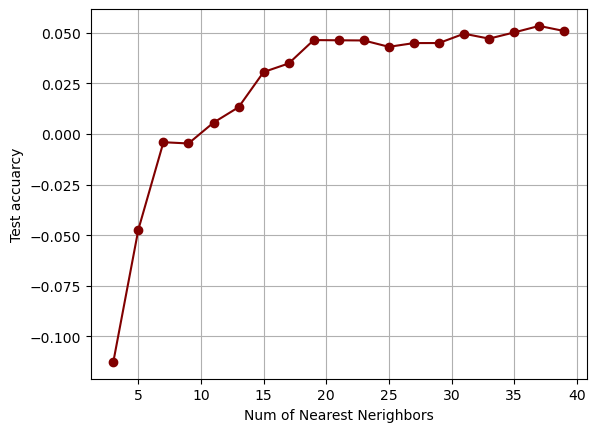

In [60]:
optimal_K()

### BaggingRegressor for KNeighborsRegressor

In [61]:
bag3=BaggingRegressor(n_estimators=25)
bag3_res=model_eval(x_train,x_test,y_train,y_test,Knn1,"Bagging for KN")
bag3_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Bagging for KN,0.384824,-0.047204,428018.135304,1.831995e+11,257820.253408


### AdaBoostRegressor for KNeighborsRegressor

In [62]:
adaboost3=AdaBoostRegressor(n_estimators=70)
ada3_res=model_eval(x_train,x_test,y_train,y_test,Knn1,"AdaBoost for KN")
ada3_res.round(5)

,Train_scr,Test_scr,RMSE,MSE,MAE
AdaBoost for KN,0.38482,-0.0472,428018.1353,1.831995e+11,257820.25341


In [64]:
res=pd.concat([lg_res,rd_res,ls_res,dt_res,bag1_res,ada1_res,rf_res,bag2_res,ada2_res,
               knn1_res,bag3_res,ada3_res])
res.round(3)


,Train_scr,Test_scr,RMSE,MSE,MAE
Linear,0.722,0.676,238241.229,5.675888e+10,159968.298
Ridge,0.721,0.676,238230.370,5.675371e+10,160653.456
Lasso,0.721,0.676,238230.370,5.675371e+10,160653.456
Decision Tree,0.874,0.785,193943.168,3.761395e+10,123314.827
Bagging for DT,0.874,0.785,193943.168,3.761395e+10,123314.827
AddaBoost for DT,0.874,0.785,193943.168,3.761395e+10,123314.827
Random Forest,0.874,0.785,193943.168,3.761395e+10,123314.827
Bagging for RF,0.874,0.785,193943.168,3.761395e+10,123314.827
AdaBoost for RF,0.932,0.826,174458.531,3.043578e+10,106834.364
KNeighbours,0.385,-0.047,428018.135,1.831995e+11,257820.253


### Hyper Parameter Tunning

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10,15,20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_rf_model = grid_search.best_estimator_
accuracy = best_rf_model.score(x_test, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")

KeyboardInterrupt: 

In [67]:
rf1=RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_split=5,min_samples_leaf=1)
rf_res=model_eval(x_train,x_test,y_train,y_test,rf1,"Random Forest")
rf_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Random Forest,0.947695,0.839251,167695.127852,2.812166e+10,102611.066503


In [68]:
bg4=BaggingRegressor(n_estimators=200,estimator=rf1,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
bag1_res=model_eval(x_train,x_test,y_train,y_test,rf1,"Bagging for Rf")
bag1_res

,Train_scr,Test_scr,RMSE,MSE,MAE
Bagging for Rf,0.94629,0.84093,166817.216422,2.782798e+10,102411.908964


In [69]:
add5=BaggingRegressor(n_estimators=100,estimator=rf1)
bag1_res=model_eval(x_train,x_test,y_train,y_test,rf1,"adda for rf")
bag1_res

,Train_scr,Test_scr,RMSE,MSE,MAE
adda for rf,0.947374,0.837095,168815.841415,2.849879e+10,102991.588182


### Choosing the Best model

In [70]:
import pickle

In [71]:
final_model=RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_split=5,min_samples_leaf=1)
final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=200)

In [72]:
pickle.dump(final_model,open('final.pkl','wb'))

In [73]:
x.head()

,year,km_driven,model_enc,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,70000.0,6,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,50000.0,164,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,100000.0,161,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,46000.0,125,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,141000.0,17,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
x.columns

Index(['year', 'km_driven', 'model_enc', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_Ambassador',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

In [75]:
print(len(brand))

3577


### Analysing data in Details for Web Devolp

In [76]:
df2=pd.read_csv(r'CAR DETAILS.csv')
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [77]:
brand=set(brand)
print(brand)

{'Honda', 'Audi', 'BMW', 'Maruti', 'Renault', 'Hyundai', 'Tata', 'Volvo', 'Force', 'Ambassador', 'Mahindra', 'Land', 'Fiat', 'Ford', 'Chevrolet', 'Nissan', 'Volkswagen', 'Jaguar', 'Isuzu', 'Skoda', 'Kia', 'OpelCorsa', 'Toyota', 'Datsun', 'Mitsubishi', 'Daewoo', 'MG', 'Mercedes-Benz', 'Jeep'}


In [78]:
fuel=set(df2['fuel'])
fuel


{'CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'}

In [79]:
car_name=list(df2['name'])
#print(car_names)
print(len(car_names))

3577


In [80]:
brand,model,sub_class=[],[],[]
for car in car_name:
    parts=car.split()
    x=parts[0]
    y=parts[1]
    z=parts[2:]
    brand.append(x)
    model.append(y)
    sub_class.append(z)
    
print(len(brand))
print(len(model))
print(len(sub_class))

4340
4340
4340


In [81]:
sub_class=[' '.join(map(str, item)) for item in sub_class]

In [82]:
df2['brand1']=brand
df2['model1']=model
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand1,model1
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [83]:
df2.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand1', 'model1'],
      dtype='object')

In [84]:
seller_type=set(df2['seller_type'])
seller_type

{'Dealer', 'Individual', 'Trustmark Dealer'}

In [85]:
transmission=set(df2['transmission'])
transmission

{'Automatic', 'Manual'}

In [86]:
owner=set(df2['owner'])
owner

{'First Owner',
 'Fourth & Above Owner',
 'Second Owner',
 'Test Drive Car',
 'Third Owner'}

In [87]:
model=set(df2['model1'])
print(model)

{'Jazz', 'Accent', 'Celerio', 'Fortuner', 'A5', 'Yaris', 'Bolero', 'Xylo', 'E-Class', 'XUV300', '3', 'NuvoSport', 'Vitara', 'Spacio', 'Ciaz', 'Harrier', 'CR-V', 'Captiva', 'Laura', 'Enjoy', 'Marazzo', 'A-Star', 'Civic', 'Xenon', 'Koleos', 'Terrano', 'i10', 'Altroz', 'XC', 'Fabia', 'CrossPolo', 'Swift', 'Hector', 'Mobilio', 'XJ', 'Nano', 'Avventura', 'Aspire', 'Duster', 'CLASSIC', 'XF', 'Getz', 'Ignis', 'V40', 'Innova', 'KWID', 'Ikon', 'Fusion', 'Q3', 'Optra', 'Thar', 'Cruze', 'XC60', 'Corolla', 'Montero', 'Aria', 'Esteem', 'Scala', 'Q7', 'i20', 'Sunny', 'Qualis', 'Freestyle', 'BRV', 'EON', 'Octavia', 'Superb', 'X-Trail', 'Palio', 'Spark', 'M-Class', 'Omni', 'GLS', 'Hexa', '1.6Gls', 'Evalia', 'Nexon', 'Grand', 'Eeco', '1.4', 'Amaze', 'Brio', 'EcoSport', 'GL-Class', 'Passat', 'Baleno', '5', 'Lodgy', 'Classic', 'Q5', 'Tavera', 'Sail', 'Safari', 'Verito', 'S-Cross', 'Pajero', 'Manza', 'Rapid', 'Camry', 'Venue', 'Renault', 'Ecosport', 'GO', 'Beat', 'Matiz', 'TUV', 'Supro', 'Yeti', 'A8', 'Se